## Data Visualization and Simple SVM

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array

In [2]:
# Reading the dataset
data = pd.read_csv('/home/alaa/Desktop/Data_Analytics/Tweets.csv')

---
### Visualization

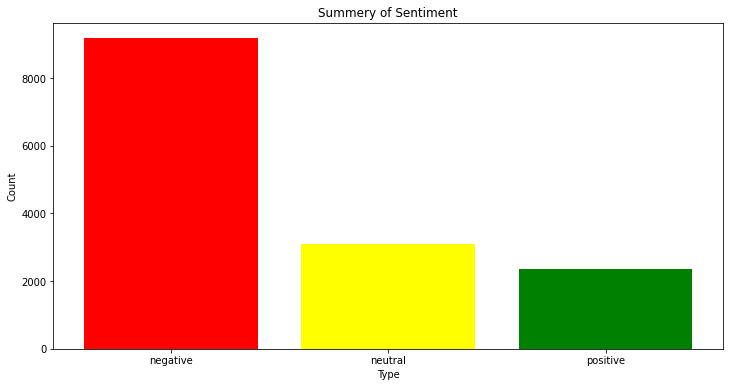

In [3]:
# Proportion of all reviews for all airlines
counter = data.airline_sentiment.value_counts()
index = [1,2,3]
plt.figure(1,figsize=(12,6))
plt.bar(index,counter,color=['red','yellow','green'])
plt.xticks(index,['negative','neutral','positive'],rotation=0)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Summery of Sentiment')
plt.show()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
dtype: int64


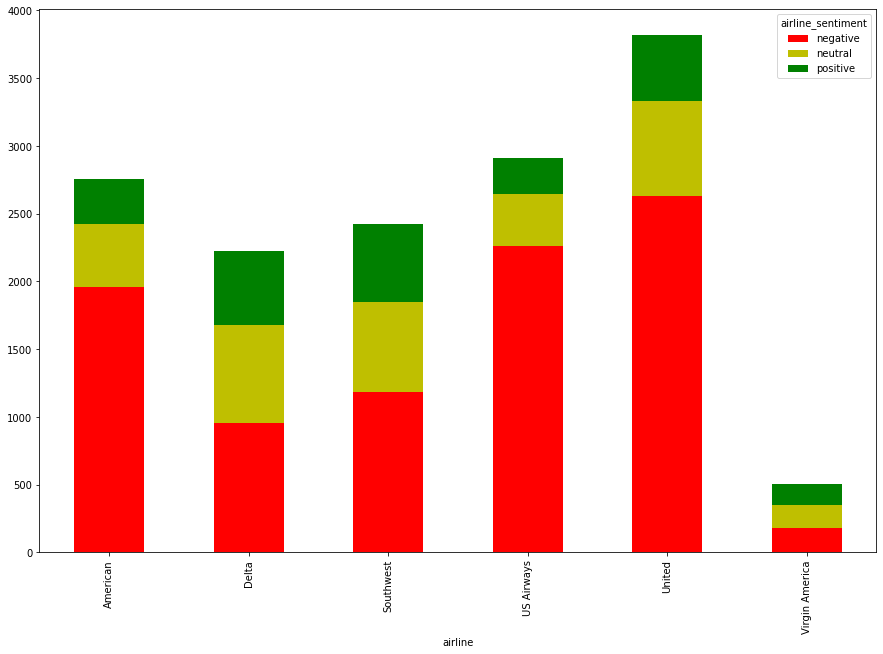

In [4]:
# Numbers of each type of review for each airline.
figure_2 = data.groupby(['airline', 'airline_sentiment']).size()
figure_2.unstack().plot(kind='bar', stacked=True,color=['r', 'y', 'g'], figsize=(15,10))
print(figure_2)
plt.show()

            Negative Percentage
American               0.710402
Delta                  0.429793
Southwest              0.490083
US Airways             0.776862
United                 0.688906
Virgin                 0.359127


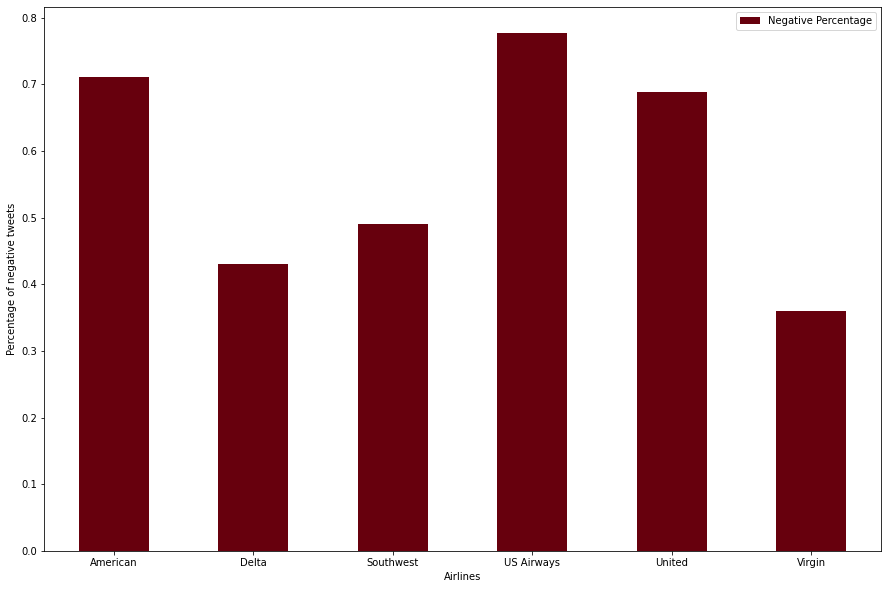

In [5]:
# Percentage of the negative reviews for each airline.
negative_tweets = data.groupby(['airline','airline_sentiment']).count().iloc[:,0]
total_tweets = data.groupby(['airline'])['airline_sentiment'].count()

Airline_negative_percentage = {'American':negative_tweets[0] / total_tweets[0],'Delta':negative_tweets[3] / total_tweets[1],'Southwest': negative_tweets[6] / total_tweets[2],
'US Airways': negative_tweets[9] / total_tweets[3],'United': negative_tweets[12] / total_tweets[4],'Virgin': negative_tweets[15] / total_tweets[5]}
percentage = pd.DataFrame.from_dict(Airline_negative_percentage, orient = 'index')
percentage.columns = ['Negative Percentage']
print(percentage)
ax = percentage.plot(kind = 'bar', rot=0, colormap = 'Reds_r', figsize=(15,10))
ax.set_xlabel('Airlines')
ax.set_ylabel('Percentage of negative tweets')
plt.show()

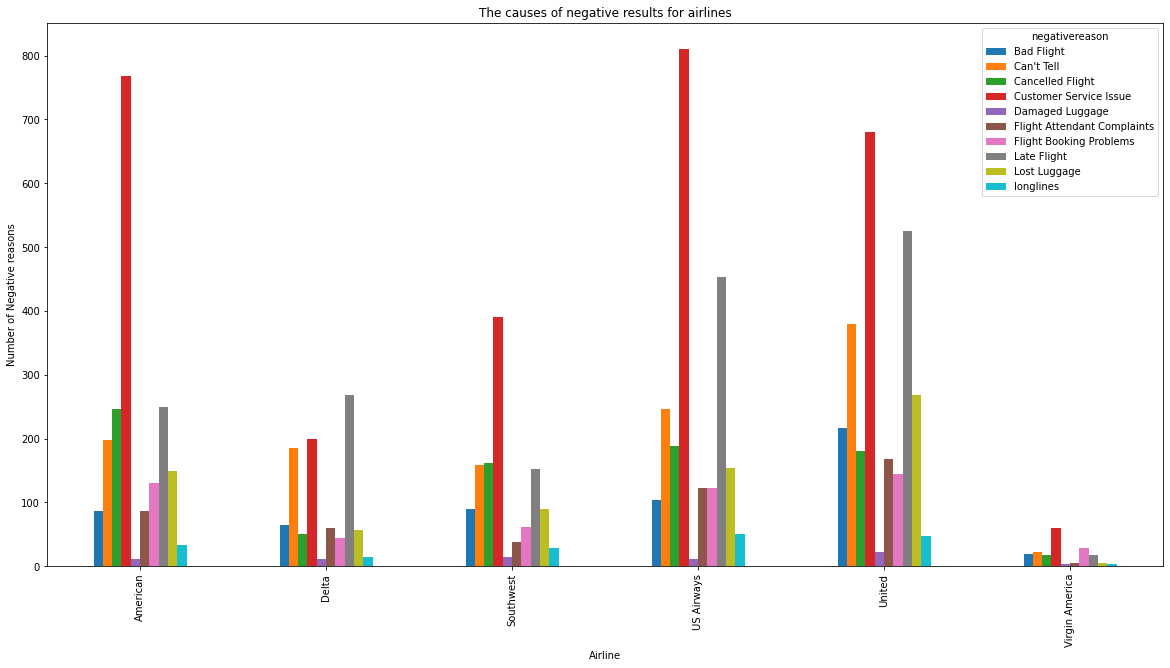

In [6]:
# Proportion of reasons for negative reviews for each airline
negative_reasons = data.groupby('airline')['negativereason'].value_counts(ascending=True)
negative_reasons.groupby(['airline','negativereason']).sum().unstack().plot(kind='bar', figsize=(20,10))
plt.xlabel('Airline')
plt.ylabel('Number of Negative reasons')
plt.title("The causes of negative results for airlines")
plt.show()

---
### Preprocessing

In [7]:
# Importing libraries
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

In [8]:
# Data cleaning and preprocessing
# Removing mentions starting with '@'
def remove_mentions(input_tweet):
    for i in range(len(input_tweet)):
        input_tweet[i] = re.sub(r'@\w+', '', input_tweet[i])
    return input_tweet

# Removing hyperlinks starting with 'http'
def remove_links(input_tweet):
    for i in range(len(input_tweet)):
        input_tweet[i] = re.sub(r'http\S+', '',input_tweet[i])
    return input_tweet

# Removing stopwords available in stopwords library
def remove_stopwords(input_tweet):
    list_of_stopwords = stopwords.words('english')
    # Keeping meaningful stopwords
    important_stopwords = ["not", "no"]
    words = input_tweet.split() 
    clean_stopwords = [word for word in words 
                       if (word not in list_of_stopwords or word in important_stopwords) and len(word) > 1] 
    return " ".join(clean_stopwords)

# Removing all punctuation symbols
def remove_punctuation(input_tweet):
    for i in range(len(input_tweet)):
        input_tweet[i] = re.sub(r'[^\w\s]','',input_tweet[i])
    return input_tweet

# Converting text to lowercase
def lower_case(input_tweet):
    for i in range(len(input_tweet)):
        input_tweet[i] = input_tweet[i].lower()
    return input_tweet

In [ ]:
# Pre-processing steps
data_new = data[['text', 'airline_sentiment']]
preprocessed_data = data_new.apply(remove_mentions).apply(remove_links).apply(remove_punctuation).apply(lower_case)
cleaned_tweets = []
for tweets in preprocessed_data.text:
    clean_stopwords = remove_stopwords(tweets)
    cleaned_tweets.append(clean_stopwords)

X = cleaned_tweets
Y = preprocessed_data['airline_sentiment']

# Mapping for Label Encoding
Y = Y.map({'negative':0, 'positive':1, 'neutral':2}).astype(int)

In [9]:
# Getting all useful words
comment_words = ''
for val in cleaned_tweets: 
    # Typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split()    
    comment_words += " ".join(tokens)+" "

In [10]:
# Generating word cloud
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 1, collocations=False).generate(comment_words)

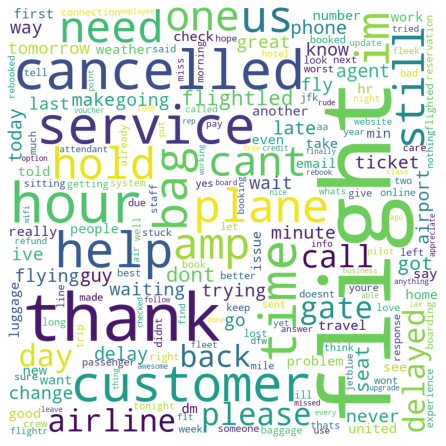

In [11]:
# Showing word cloud using matplotlib
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

---
### Performing SVM

In [12]:
# Label Encoding for features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

values = array(X)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [13]:
# Splitting dataset into train, test and validation sets
X_train, X_test, y_train, y_test = train_test_split(onehot_encoded, Y, test_size=0.15, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.18, random_state=20)

In [14]:
# Printing model statistics
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, classification_report

def results(labels, pred):
    print(confusion_matrix(labels,pred))  
    print(classification_report(labels,pred))  

In [15]:
# Initializing  SVM
from sklearn.svm import LinearSVC, SVC

model = LinearSVC(C=1)
model.fit(X_train, y_train)

# Testing accuracy on Validation data
print ("Validation Accuracy of SVM : %s" % ( accuracy_score(y_val, model.predict(X_val))))

Validation Accuracy of SVM : 0.6513392857142857


In [16]:
# Testing accuracy on test data and printing results
print ("Test Accuracy of SVM : %s" % ( accuracy_score(y_test, model.predict(X_test))))
results(y_test, model.predict(X_test))

Test Accuracy of SVM : 0.6643897996357013
[[1394    0    0]
 [ 321   37    4]
 [ 407    5   28]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      1394
           1       0.88      0.10      0.18       362
           2       0.88      0.06      0.12       440

    accuracy                           0.66      2196
   macro avg       0.80      0.39      0.36      2196
weighted avg       0.74      0.66      0.56      2196

